# Projeto - Avaliação de Score com Machine Learning

[Link da base no Kaggle:](https://www.kaggle.com/datasets/parisrohan/credit-score-classification)

<b>Descrição do Projeto</b>


O objetivo deste projeto é criar um modelo de classificação que possa prever a pontuação de crédito de uma pessoa com base em diversas variáveis financeiras. Este tipo de análise é extremamente útil para bancos e instituições financeiras na avaliação de risco de crédito.

![Minha Imagem](dados.jpg)

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import TargetEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
df_treino = pd.read_csv('train.csv', low_memory=False)
df_teste = pd.read_csv('test.csv', low_memory=False)

In [3]:
df_treino.shape

(100000, 28)

In [4]:
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
df_treino.sample(6)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
95459,0x24555,CUS_0x8798,April,Antonella Cinelliv,45,685-55-7349,Architect,35348.12,2890.676667,1,...,_,1316.73,30.216217,18 Years and 5 Months,No,32.747967,116.16974236858215,High_spent_Medium_value_payments,390.1499577266467,Good
49596,0x1389a,CUS_0x6f11,May,Oliviaj,26,881-68-5762,Developer,30815.44,NaN,5,...,Standard,1413.42,33.429982,11 Years and 5 Months,Yes,56.177029,32.60925815669312,High_spent_Medium_value_payments,436.6090466426812,Standard
14069,0x686f,CUS_0x1f8c,June,Dolanl,37,745-18-8559,Musician,106418.67,8961.222500,3,...,Standard,848.03,26.248052,5 Years and 6 Months,Yes,239.245750,535.1711458395138,High_spent_Small_value_payments,381.7053543576744,Standard
51373,0x14303,CUS_0x707c,June,Busvinew,33,670-84-4853,Writer,142496.12,11649.676667,4,...,Standard,460.79,36.597666,19 Years and 3 Months,No,0.000000,627.3584126524023,High_spent_Small_value_payments,797.6092540142645,Standard
86299,0x20fa9,CUS_0x2509,April,Jonesu,14,#F%$D@*&8,Entrepreneur,37777.92,3055.160000,3,...,Standard,1336.0,26.778224,8 Years and 8 Months,Yes,100.427950,61.97512163396557,High_spent_Medium_value_payments,393.1129286101314,Poor
73968,0x1c76a,CUS_0x5a82,January,Jonathan Lefff,25,896-84-7984,Writer,33467.15,NaN,7,...,Good,1294.23,33.518311,30 Years and 3 Months,No,0.000000,367.191469365368,Low_spent_Small_value_payments,226.80144730129882,Good


In [6]:
df_treino.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


Colunas numéricas:

Monthly_Inhand_Salary
Num_Bank_Accounts
Num_Credit_Card
Interest_Rate
Delay_from_due_date
Num_Credit_Inquiries
Credit_Utilization_Ratio
Total_EMI_per_month
Age
Annual_Income
Num_of_Loan
Num_of_Delayed_Payment
Changed_Credit_Limit
Outstanding_Debt
Amount_invested_monthly
Monthly_Balance

Colunas categóricas:
Occupation
TypeofLoan
CreditMix
CreditHistoryAge
PaymentofMinAmount
PaymentBehaviour
CreditScore


Irrelavant columns for the problem:
ID
Customer_ID
Month
Name
SSN

In [7]:
#Eliminando colunas irrelevantes nos dataframe de treino e teste
df_treino = df_treino.drop(columns=['ID', 'Customer_ID', 'Month', 'Name', 'SSN'], axis=1)
df_teste = df_teste.drop(columns=['ID', 'Customer_ID', 'Month', 'Name', 'SSN'], axis=1)

In [8]:
df_treino.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [9]:
#Verificando valores nulos
df_treino.isnull().sum().sort_values(ascending=False)

Monthly_Inhand_Salary       15002
Type_of_Loan                11408
Credit_History_Age           9030
Num_of_Delayed_Payment       7002
Amount_invested_monthly      4479
Num_Credit_Inquiries         1965
Monthly_Balance              1200
Age                             0
Outstanding_Debt                0
Payment_Behaviour               0
Total_EMI_per_month             0
Payment_of_Min_Amount           0
Credit_Utilization_Ratio        0
Changed_Credit_Limit            0
Credit_Mix                      0
Occupation                      0
Delay_from_due_date             0
Num_of_Loan                     0
Interest_Rate                   0
Num_Credit_Card                 0
Num_Bank_Accounts               0
Annual_Income                   0
Credit_Score                    0
dtype: int64

In [10]:
df_treino

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,-500,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.86622816574095,Poor
99996,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.651610435322,Poor
99997,25,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.8090832742814,Poor
99998,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.1649785257098,Standard


In [11]:
#Vamos fazer uma limpeza no formato que estão alguns dados.
df_treino = df_treino.applymap(
    lambda x: x if x is np.NaN or not \
        isinstance(x, str) else str(x).strip('_')).replace(
            ['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN
        )

In [12]:
#Fazendo o mesmo para os dados de teste
df_teste = df_teste.applymap(
    lambda x: x if x is np.NaN or not \
        isinstance(x, str) else str(x).strip('_')).replace(
            ['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN
        )

In [13]:
df_treino.isnull().sum().sort_values(ascending=False)

Credit_Mix                  20195
Monthly_Inhand_Salary       15002
Type_of_Loan                11408
Credit_History_Age           9030
Payment_Behaviour            7600
Occupation                   7062
Num_of_Delayed_Payment       7002
Amount_invested_monthly      4479
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Monthly_Balance              1200
Credit_Utilization_Ratio        0
Total_EMI_per_month             0
Payment_of_Min_Amount           0
Age                             0
Outstanding_Debt                0
Delay_from_due_date             0
Num_of_Loan                     0
Interest_Rate                   0
Num_Credit_Card                 0
Num_Bank_Accounts               0
Annual_Income                   0
Credit_Score                    0
dtype: int64

Repare que agora o número de NaN's aumento.

In [14]:
df_treino.dtypes

Age                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                 object
dtype: object

Repare que alguns colunas numéricas estão como objetcs, vamos transformar todas elas em número.

In [15]:
#Para Treino
df_treino.Age = df_treino.Age.astype(int)
df_treino.Annual_Income = df_treino.Annual_Income.astype(float)
df_treino.Num_of_Loan = df_treino.Num_of_Loan.astype(int)
df_treino.Num_of_Delayed_Payment = df_treino.Num_of_Delayed_Payment.astype(float)
df_treino.Changed_Credit_Limit = df_treino.Changed_Credit_Limit.astype(float)
df_treino.Outstanding_Debt = df_treino.Outstanding_Debt.astype(float)
df_treino.Amount_invested_monthly = df_treino.Amount_invested_monthly.astype(float)
df_treino.Monthly_Balance = df_treino.Monthly_Balance.astype(float)

#Para Teste
df_teste.Age = df_teste.Age.astype(int)
df_teste.Annual_Income = df_teste.Annual_Income.astype(float)
df_teste.Num_of_Loan = df_teste.Num_of_Loan.astype(int)
df_teste.Num_of_Delayed_Payment = df_teste.Num_of_Delayed_Payment.astype(float)
df_teste.Changed_Credit_Limit = df_teste.Changed_Credit_Limit.astype(float)
df_teste.Outstanding_Debt = df_teste.Outstanding_Debt.astype(float)
df_teste.Amount_invested_monthly = df_teste.Amount_invested_monthly.astype(float)
df_teste.Monthly_Balance = df_teste.Monthly_Balance.astype(float)

In [16]:
df_treino['Age'].value_counts().sort_values(ascending=True)

Age
5419       1
3625       1
6354       1
3724       1
480        1
        ... 
32      2884
26      2945
31      2955
28      2968
38      2994
Name: count, Length: 1728, dtype: int64

In [17]:
#Vamos filtrar a Idade, pois havia idades < 0 e idades > 100(o que pode acontecer, mas pra efeitos vamos desconsiderar)
df_treinofiltrado = df_treino[(df_treino['Age'] < 100) & (df_treino['Age'] > 0)]
df_testefiltrado = df_teste[(df_teste['Age'] < 100) & (df_teste['Age'] > 0)]

In [18]:
#Vamos extrair apenas os anos da coluna Credit_History_Age e desconsiderar os meses.
def puxa_anos(val):
    if val is not None:
        anos = str(val).strip()[0:2]
        return anos
    return None

df_treinofiltrado.loc[:, 'Credit_History_Age'] = df_treinofiltrado['Credit_History_Age'].apply(puxa_anos)
df_treinofiltrado.loc[:, 'Credit_History_Age'] = df_treinofiltrado['Credit_History_Age'].replace({'na': np.NaN})

df_testefiltrado.loc[:, 'Credit_History_Age'] = df_testefiltrado['Credit_History_Age'].apply(puxa_anos)
df_testefiltrado.loc[:, 'Credit_History_Age'] = df_testefiltrado['Credit_History_Age'].replace({'na': np.NaN}) 

Antes de partir para a visualização da base e para o modelo em si, vamos tratar os valores faltantes.

In [19]:
#Relatório dados faltantes
def missing_report(df):
    missing = df.isnull().sum()
    percent = (missing / len(df)) * 100
    report = pd.DataFrame({'missing_count': missing, 'missing_percent': percent})
    report = report[report['missing_count'] > 0].sort_values(by='missing_percent', ascending=False)
    return report

missing_report(df_treinofiltrado)

,missing_count,missing_percent
Credit_Mix,19633,20.193781
Monthly_Inhand_Salary,14597,15.013937
Type_of_Loan,11076,11.392366
Credit_History_Age,8792,9.043128
Payment_Behaviour,7377,7.587711
Occupation,6873,7.069315
Num_of_Delayed_Payment,6824,7.018915
Amount_invested_monthly,4344,4.468079
Changed_Credit_Limit,2037,2.095183
Num_Credit_Inquiries,1906,1.960441


In [20]:
df_treinofiltrado.loc[:, 'Credit_History_Age'] = pd.to_numeric(df_treinofiltrado['Credit_History_Age'], errors='coerce').astype('Int64')
df_testefiltrado.loc[:, 'Credit_History_Age'] = pd.to_numeric(df_testefiltrado['Credit_History_Age'], errors='coerce').astype('Int64')


#Separar em colunas numéricas e categóricas
catecols = df_treinofiltrado.select_dtypes(include=['object', 'category']).columns.tolist()
numcols = df_treinofiltrado.select_dtypes(include=['int32', 'int64', 'float64']).columns.tolist()

### Avaliando a importância de cada coluna.

In [21]:
def obtendo_feature_importancia(df, target):
    df_temp = df.copy()
    df_temp = df_temp.dropna()
    
    le = LabelEncoder()
    for col in df_temp.select_dtypes(include='object').columns:
        df_temp[col] = le.fit_transform(df_temp[col])
        
    X = df_temp.drop(target, axis=1)
    y = df_temp[target]
    
    model = RandomForestClassifier(n_estimators=100)  #Se fosse modelo de Regressão seria RandomForestRegressor(n_estimators=100)
    model.fit(X, y)
    importances = pd.Series(model.feature_importances_, index=X.columns)
    return importances.sort_values(ascending=False)

In [22]:
obtendo_feature_importancia(df_treinofiltrado, 'Credit_Score')

Outstanding_Debt            0.107521
Interest_Rate               0.076799
Credit_Mix                  0.071571
Changed_Credit_Limit        0.059050
Delay_from_due_date         0.058254
Num_Credit_Inquiries        0.052497
Monthly_Balance             0.047089
Credit_Utilization_Ratio    0.045762
Amount_invested_monthly     0.045469
Credit_History_Age          0.044425
Total_EMI_per_month         0.041273
Monthly_Inhand_Salary       0.040301
Type_of_Loan                0.039789
Num_of_Delayed_Payment      0.039275
Annual_Income               0.038644
Age                         0.036863
Num_Credit_Card             0.035652
Num_Bank_Accounts           0.028797
Occupation                  0.027128
Num_of_Loan                 0.022252
Payment_Behaviour           0.021161
Payment_of_Min_Amount       0.020428
dtype: float64

Features mais importantes: Outstanding_Debt, Interest_Rate, Credit_Mix e Changed_Credit_Limit parecem ser as mais relevantes para o modelo.

Features menos importantes: Payment_of_Min_Amount, Occupation, Num_of_Loan são as de menor impacto.

In [23]:
df_treinofiltrado.dtypes

Age                           int32
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int32
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                 object
dtype: object

In [24]:
#Medição da Simetria
skew_report = df_treinofiltrado[numcols].skew().sort_values(ascending=False)
skew_report

Num_of_Loan                  16.071839
Num_of_Delayed_Payment       14.334698
Annual_Income                12.498544
Num_Bank_Accounts            11.194078
Num_Credit_Inquiries          9.769826
Interest_Rate                 8.994838
Num_Credit_Card               8.464140
Total_EMI_per_month           7.122703
Amount_invested_monthly       4.329249
Outstanding_Debt              1.207296
Monthly_Inhand_Salary         1.126872
Delay_from_due_date           0.966090
Changed_Credit_Limit          0.639910
Age                           0.162602
Credit_Utilization_Ratio      0.027877
Monthly_Balance            -103.290314
dtype: float64

Skew > 1 ou < -1: distribuição muito assimétrica ⇒ usar mediana

Skew entre -0.5 e 0.5: mais simétrica ⇒ pode usar média

A medição da simetria (skew()) te dá uma ideia de quais variáveis estão com distribuições assimétricas (não normais). Isso é importante porque algumas técnicas de modelagem (principalmente, modelos lineares) podem se beneficiar de transformações em features com alto skewness.

Resultados:
Altamente assimétricas:

Num_of_Loan (skew = 16.07)

Num_of_Delayed_Payment (skew = 14.33)

Annual_Income (skew = 12.50)

Num_Bank_Accounts (skew = 11.19)

Levemente assimétricas:

Monthly_Balance tem um valor extremamente negativo (-103.29) de skew, o que sugere que sua distribuição está completamente invertida ou cheia de valores atípicos. Vale investigar mais a fundo.

Distribuições mais balanceadas:

Algumas features, como Credit_History_Age, Credit_Utilization_Ratio, e Age, apresentam skew mais próximo de 0, o que significa que já estão mais balanceadas e não precisam de transformações urgentes.

In [25]:
#Substituindo os valores ausentes de variáveis categóricas como Credit_Mix, Type_of_Loan, Occupation e Payment_Behaviour com a moda
df_treinofiltrado.loc[:, 'Credit_Mix'] = df_treinofiltrado['Credit_Mix'].fillna(df_treinofiltrado['Credit_Mix'].mode()[0])
df_treinofiltrado.loc[:, 'Type_of_Loan'] = df_treinofiltrado['Type_of_Loan'].fillna(df_treinofiltrado['Type_of_Loan'].mode()[0])
df_treinofiltrado.loc[:, 'Occupation'] = df_treinofiltrado['Occupation'].fillna(df_treinofiltrado['Occupation'].mode()[0])
df_treinofiltrado.loc[:, 'Payment_Behaviour'] = df_treinofiltrado['Payment_Behaviour'].fillna(df_treinofiltrado['Payment_Behaviour'].mode()[0])

#Fazendo o mesmo para teste

df_testefiltrado.loc[:, 'Credit_Mix'] = df_testefiltrado['Credit_Mix'].fillna(df_testefiltrado['Credit_Mix'].mode()[0])
df_testefiltrado.loc[:, 'Type_of_Loan'] = df_testefiltrado['Type_of_Loan'].fillna(df_testefiltrado['Type_of_Loan'].mode()[0])
df_testefiltrado.loc[:, 'Occupation'] = df_testefiltrado['Occupation'].fillna(df_testefiltrado['Occupation'].mode()[0])
df_testefiltrado.loc[:, 'Payment_Behaviour'] = df_testefiltrado['Payment_Behaviour'].fillna(df_testefiltrado['Payment_Behaviour'].mode()[0])

In [26]:
#Variáveis como Credit_History_Age, possuem skew próximo de 0, portanto, vamos substituir os valores ausentes pela média
media = df_treinofiltrado['Credit_History_Age'].mean()
media_arredondada = int(np.ceil(media))

df_treinofiltrado.loc[:, 'Credit_History_Age'] = df_treinofiltrado['Credit_History_Age'].fillna(media_arredondada)
df_treinofiltrado['Credit_History_Age'] = df_treinofiltrado['Credit_History_Age'].astype('int64')



#Fazendo o mesmo para a base de teste

media = df_testefiltrado['Credit_History_Age'].mean()
media_arredondada = int(np.ceil(media))

df_testefiltrado.loc[:, 'Credit_History_Age'] = df_testefiltrado['Credit_History_Age'].fillna(media_arredondada)
df_testefiltrado['Credit_History_Age'] = df_testefiltrado['Credit_History_Age'].astype('int64')

C:\Users\jrodr\AppData\Local\Temp\ipykernel_42132\1498152891.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_treinofiltrado['Credit_History_Age'] = df_treinofiltrado['Credit_History_Age'].astype('int64')
C:\Users\jrodr\AppData\Local\Temp\ipykernel_42132\1498152891.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testefiltrado['Credit_History_Age'] = df_testefiltrado['Credit_History_Age'].astype('int64')


In [27]:
#Relatório dados faltantes
def missing_report(df):
    missing = df.isnull().sum()
    percent = (missing / len(df)) * 100
    report = pd.DataFrame({'missing_count': missing, 'missing_percent': percent})
    report = report[report['missing_count'] > 0].sort_values(by='missing_percent', ascending=False)
    return report

missing_report(df_treinofiltrado)

,missing_count,missing_percent
Monthly_Inhand_Salary,14597,15.013937
Num_of_Delayed_Payment,6824,7.018915
Amount_invested_monthly,4344,4.468079
Changed_Credit_Limit,2037,2.095183
Num_Credit_Inquiries,1906,1.960441
Monthly_Balance,1179,1.212676


Usarei Mediana para Monthly_Inhand_Salary

In [28]:
# Verifica a média de outras variáveis quando o valor está ausente
print(df_treinofiltrado[df_treinofiltrado['Num_of_Delayed_Payment'].isna()][['Credit_History_Age', 'Delay_from_due_date', 'Num_Credit_Inquiries']].describe())

       Credit_History_Age  Delay_from_due_date  Num_Credit_Inquiries
count         6824.000000          6824.000000           6692.000000
mean            17.912368            21.144930             31.561267
std              7.940915            14.926463            211.136034
min              0.000000            -5.000000              0.000000
25%             12.000000            10.000000              3.000000
50%             18.000000            18.000000              6.000000
75%             24.000000            28.000000              9.000000
max             33.000000            67.000000           2592.000000


In [29]:
#Amout_invested_monthly
# Criar dois grupos
invest_missing = df_treinofiltrado[df_treinofiltrado['Amount_invested_monthly'].isna()]
invest_present = df_treinofiltrado[df_treinofiltrado['Amount_invested_monthly'].notna()]

# Comparar médias de variáveis relacionadas
cols_financeiras = ['Annual_Income', 'Monthly_Inhand_Salary', 'Monthly_Balance', 
                    'Outstanding_Debt', 'Total_EMI_per_month']

# Comparando as médias
comparison = pd.DataFrame({
    'Média (ausentes)': invest_missing[cols_financeiras].mean(),
    'Média (presentes)': invest_present[cols_financeiras].mean()
})

print(comparison)

                       Média (ausentes)  Média (presentes)
Annual_Income              1.574370e+05       1.777505e+05
Monthly_Inhand_Salary      4.228837e+03       4.193510e+03
Monthly_Balance           -7.775445e+22      -2.906227e+22
Outstanding_Debt           1.433319e+03       1.425971e+03
Total_EMI_per_month        1.325309e+03       1.399887e+03


Se os ausentes têm valores muito baixos de renda ou saldo → pode indicar que não têm capacidade de investir → 0 faria sentido.

Se os ausentes têm valores parecidos com quem investe → mais provável que seja só dado faltante → use mediana.

Não é apropriado preencher com 0, pois os ausentes não têm perfil financeiramente diferente dos que investem.

In [30]:
#Changed_Credit_Limit
# Dividindo os grupos
changed_missing = df_treinofiltrado[df_treinofiltrado['Changed_Credit_Limit'].isna()]
changed_present = df_treinofiltrado[df_treinofiltrado['Changed_Credit_Limit'].notna()]

# Variáveis para comparação
cols = ['Annual_Income', 'Credit_Utilization_Ratio', 'Outstanding_Debt',
        'Monthly_Inhand_Salary', 'Num_of_Delayed_Payment']

# Comparando médias
comparison = pd.DataFrame({
    'Média (ausentes)': changed_missing[cols].mean(),
    'Média (presentes)': changed_present[cols].mean()
})

print(comparison)

                          Média (ausentes)  Média (presentes)
Annual_Income                201194.617037      176321.775892
Credit_Utilization_Ratio         32.461374          32.280984
Outstanding_Debt               1411.169539        1426.622949
Monthly_Inhand_Salary          4307.113934        4192.678018
Num_of_Delayed_Payment           26.439664          30.940470


Renda (Annual Income): Os clientes com valores ausentes têm renda mais alta. Isso pode sugerir que essas pessoas potencialmente têm mais crédito ou são clientes de maior perfil, o que poderia indicar que não houve necessidade de mudar o limite de crédito — ou seja, os dados ausentes não são representativos de problemas de crédito.

In [31]:
#Num_Credit_Inquiries
# Grupos
inq_missing = df_treinofiltrado[df_treinofiltrado['Num_Credit_Inquiries'].isna()]
inq_present = df_treinofiltrado[df_treinofiltrado['Num_Credit_Inquiries'].notna()]

# Variáveis relacionadas
cols = ['Annual_Income', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
        'Num_of_Delayed_Payment', 'Monthly_Inhand_Salary']

# Comparação de médias
comparison = pd.DataFrame({
    'Média (ausentes)': inq_missing[cols].mean(),
    'Média (presentes)': inq_present[cols].mean()
})

print(comparison)

                          Média (ausentes)  Média (presentes)
Annual_Income                162474.845824      177130.217473
Outstanding_Debt               1412.761868        1426.569869
Credit_Utilization_Ratio         32.228208          32.285894
Num_of_Delayed_Payment           32.465051          30.813157
Monthly_Inhand_Salary          4259.716737        4193.765651


Clientes com Num_Credit_Inquiries = NaN têm perfil quase idêntico aos demais.

Não há indícios de que ausência signifique “nenhuma consulta”.

Um número alto de consultas pode indicar desespero por crédito ou perfil de risco mais elevado

Um número baixo pode indicar estabilidade ou pouco envolvimento com crédito

Um número alto de consultas pode indicar desespero por crédito ou perfil de risco mais elevado

Um número baixo pode indicar estabilidade ou pouco envolvimento com crédito

In [32]:
#Vamos tratar Monthly_Inhand_Salary, Num_of_Delayed_Payment, Amount_invested_monthly, Changed_Credit_Limit e Num_Credit_Inquiries
df_treinofiltrado.loc[:, 'Monthly_Inhand_Salary'] = df_treinofiltrado['Monthly_Inhand_Salary'].fillna(df_treinofiltrado['Monthly_Inhand_Salary'].median())
df_treinofiltrado.loc[:, 'Num_of_Delayed_Payment'] = df_treinofiltrado['Num_of_Delayed_Payment'].fillna(df_treinofiltrado['Num_of_Delayed_Payment'].median())
df_treinofiltrado.loc[:, 'Amount_invested_monthly'] = df_treinofiltrado['Amount_invested_monthly'].fillna(df_treinofiltrado['Amount_invested_monthly'].median())
df_treinofiltrado.loc[:, 'Changed_Credit_Limit'] = df_treinofiltrado['Changed_Credit_Limit'].fillna(df_treinofiltrado['Changed_Credit_Limit'].median())
df_treinofiltrado.loc[:, 'Num_Credit_Inquiries'] = df_treinofiltrado['Num_Credit_Inquiries'].fillna(df_treinofiltrado['Num_Credit_Inquiries'].median())
#Fazendo o mesmo para teste
df_testefiltrado.loc[:, 'Monthly_Inhand_Salary'] = df_testefiltrado['Monthly_Inhand_Salary'].fillna(df_testefiltrado['Monthly_Inhand_Salary'].median())
df_testefiltrado.loc[:, 'Num_of_Delayed_Payment'] = df_testefiltrado['Num_of_Delayed_Payment'].fillna(df_testefiltrado['Num_of_Delayed_Payment'].median())
df_testefiltrado.loc[:, 'Amount_invested_monthly'] = df_testefiltrado['Amount_invested_monthly'].fillna(df_testefiltrado['Amount_invested_monthly'].median())
df_testefiltrado.loc[:, 'Changed_Credit_Limit'] = df_testefiltrado['Changed_Credit_Limit'].fillna(df_testefiltrado['Changed_Credit_Limit'].median())
df_testefiltrado.loc[:, 'Num_Credit_Inquiries'] = df_testefiltrado['Num_Credit_Inquiries'].fillna(df_testefiltrado['Num_Credit_Inquiries'].median())

A explicação porquê utilizei mediana, está abaixo para cada coluna. Mas em geral, levei em consideração a quantidade de valores ausentes, sua importância para o modelo, sua simetria e o quanto impacta em outras variáveis.

Para cada feature foi criado um relatório entre os valores ausentes e não ausentes.

In [33]:
print(df_treinofiltrado['Monthly_Balance'].describe())
print(df_treinofiltrado['Monthly_Balance'].quantile([0.01, 0.25, 0.5, 0.75, 0.99]))

count    9.604400e+04
mean    -3.123568e+22
std      3.226612e+24
min     -3.333333e+26
25%      2.700825e+02
50%      3.366474e+02
75%      4.699451e+02
max      1.602041e+03
Name: Monthly_Balance, dtype: float64
0.01      67.829579
0.25     270.082506
0.50     336.647364
0.75     469.945127
0.99    1138.219013
Name: Monthly_Balance, dtype: float64


Distribuição real (quantis 1%–99%): entre 67.82 e 1138.21 USD → esse é o intervalo normal esperado

Mediana: 336.65 USD

Mínimo: −3.33e+26 → valor completamente fora da realidade

Média: −3.12e+22 → completamente distorcida

Std: extremamente alta

A coluna 'Monthly_Balance' necessita de uma investigação particular, dado a sua simetria de -103.

In [34]:
#Após os valores acima, notamos que estamos lidando com valores corrompidos
df_treinofiltrado = df_treinofiltrado[(df_treinofiltrado['Monthly_Balance'] > 0) & (df_treinofiltrado['Monthly_Balance'] < 5000)]
#5000 é uma margem segura com base no Q3 + 3*IQR, considerando o Q3 = 470
df_testefiltrado = df_testefiltrado[(df_testefiltrado['Monthly_Balance'] > 0) & (df_testefiltrado['Monthly_Balance'] < 5000)]

In [35]:
#Substituindo pela mediana na nossa última Coluna com valores vazios
df_treinofiltrado.loc[:, 'Monthly_Balance'] = df_treinofiltrado['Monthly_Balance'].fillna(df_treinofiltrado['Monthly_Balance'].median())
df_testefiltrado.loc[:, 'Monthly_Balance'] = df_testefiltrado['Monthly_Balance'].fillna(df_testefiltrado['Monthly_Balance'].median())

In [36]:
#Relatório dados faltantes final
def missing_report(df):
    missing = df.isnull().sum()
    percent = (missing / len(df)) * 100
    report = pd.DataFrame({'missing_count': missing, 'missing_percent': percent})
    report = report[report['missing_count'] > 0].sort_values(by='missing_percent', ascending=False)
    return report

missing_report(df_treinofiltrado)

,missing_count,missing_percent


### Vamos tratar os dados Outliers

In [37]:
#Vamos selecionar as colunas, onde valores outliers são prováveis e não são descartados

iqr_cols = [
    'Annual_Income', 'Monthly_Inhand_Salary', 'Delay_from_due_date',
    'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
    'Outstanding_Debt', 'Total_EMI_per_month', 'Amount_invested_monthly',
    'Monthly_Balance'
]

In [38]:
#Criando a mask
outliers_mask = pd.DataFrame(False, index=df_treinofiltrado.index, columns=iqr_cols)

In [39]:
for coluna in iqr_cols:
    Q1 = df_treinofiltrado[coluna].quantile(0.25)
    Q3 = df_treinofiltrado[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers_mask[coluna] = (df_treinofiltrado[coluna] < limite_inferior) | (df_treinofiltrado[coluna] > limite_superior)

In [40]:
# Linhas que têm pelo menos um outlier
linhas_com_outlier = outliers_mask.any(axis=1)
df_outliers = df_treinofiltrado[linhas_com_outlier]

print(f"{df_outliers.shape[0]} linhas com outliers encontradas.")
print(df_outliers.head())

31858 linhas com outliers encontradas.
    Age Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
16   34     Lawyer      143162.64            12187.22000                  1   
17   34   Engineer      143162.64            12187.22000                  1   
18   34     Lawyer      143162.64             3096.06625                  1   
19   34   Engineer      143162.64            12187.22000                  1   
20   34     Lawyer      143162.64            12187.22000                  1   

    Num_Credit_Card  Interest_Rate  Num_of_Loan  \
16                5              8            3   
17                5              8            3   
18                5              8            3   
19                5              8            3   
20                5              8            3   

                               Type_of_Loan  Delay_from_due_date  ...  \
16  Auto Loan, Auto Loan, and Not Specified                    5  ...   
17  Auto Loan, Auto Loan, and Not

In [41]:
#Fazendo a mesma análise para a base de teste

# Supondo que você tenha um df_teste carregado
outliers_mask_teste = pd.DataFrame(False, index=df_teste.index, columns=iqr_cols)

# Recalcular os mesmos limites usados na base de treino
for coluna in iqr_cols:
    Q1 = df_treinofiltrado[coluna].quantile(0.25)
    Q3 = df_treinofiltrado[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers_mask_teste[coluna] = (df_teste[coluna] < limite_inferior) | (df_teste[coluna] > limite_superior)

# Linhas com pelo menos um outlier
linhas_com_outlier_teste = outliers_mask_teste.any(axis=1)
df_outliers_teste = df_teste[linhas_com_outlier_teste]

print(f"{df_outliers_teste.shape[0]} linhas com outliers na base de teste.")


17570 linhas com outliers na base de teste.


Imputar os outliers (ex: mediana ou limites IQR)
 - Vantagens: Preserva o tamanho do dataset, reduz o impacto de extremos ; Melhora estabilidade da Regressão Logística, que é sensível a valores extremos.

 - Desvantagens: Pode distorcer variabilidade real dos dados em modelos baseados em árvore.
 


In [42]:
# Base de treino: tudo ok
df_treinofiltrado_outliers = df_treinofiltrado.copy()
iqr_limits = {}

for coluna in iqr_cols:
    Q1 = df_treinofiltrado[coluna].quantile(0.25)
    Q3 = df_treinofiltrado[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    iqr_limits[coluna] = (limite_inferior, limite_superior)
    df_treinofiltrado_outliers[coluna] = df_treinofiltrado[coluna].clip(lower=limite_inferior, upper=limite_superior)

print("Outliers na base Treino foram tratados por Winsorizing (capados nos limites IQR).")

# Base de teste: usa os mesmos limites calculados no treino
df_testefiltrado_outliers = df_testefiltrado.copy()

for coluna in iqr_cols:
    limite_inferior, limite_superior = iqr_limits[coluna]
    df_testefiltrado_outliers[coluna] = df_testefiltrado[coluna].clip(lower=limite_inferior, upper=limite_superior)

print("Outliers na base Teste foram tratados com os mesmos limites do treino.")

Outliers na base Treino foram tratados por Winsorizing (capados nos limites IQR).
Outliers na base Teste foram tratados com os mesmos limites do treino.


### Visualizando os dados

In [43]:
#Estilo
sns.set_theme(style="darkgrid")
#Tamanho padrão dos gráficos
plt.rcParams['figure.figsize'] = (10, 6)

# Define cores padrão, fontes e margens
plt.rcParams['axes.facecolor'] = '#f0f0f0'  # fundo cinza claro
plt.rcParams['figure.facecolor'] = '#e5e5e5'  # fundo da figura
plt.rcParams['axes.edgecolor'] = '#333333'  # borda dos eixos
plt.rcParams['axes.labelcolor'] = '#333333'
plt.rcParams['xtick.color'] = '#333333'
plt.rcParams['ytick.color'] = '#333333'
plt.rcParams['text.color'] = '#333333'
plt.rcParams['font.size'] = 12

In [44]:
#3º Matriz de Correlação

#6º Pairplot de 'Annual_Income', 'Outstanding_Debt', 'Credit_Utilization_Ratio', ''Credit_Score'' (todas juntos)

#7º ou 3º Fazer gráficos de boxplots entre Credit_Score e Monthly_Inhand_Salary

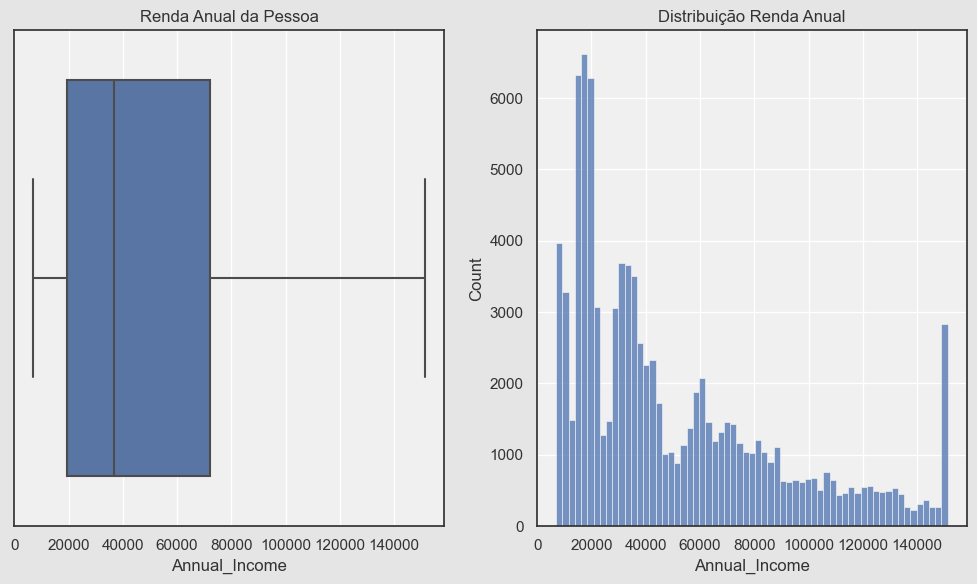

In [45]:
#Olhando para a distribuição de Renda Anual
fig, axes = plt.subplots(1, 2)

sns.boxplot(data=df_treinofiltrado_outliers, x='Annual_Income', ax=axes[0], )
axes[0].set_title('Renda Anual da Pessoa')
sns.histplot(data=df_treinofiltrado_outliers, x='Annual_Income', ax=axes[1])
axes[1].set_title('Distribuição Renda Anual')
plt.tight_layout() #Evita que títulos se sobreponham
plt.show()

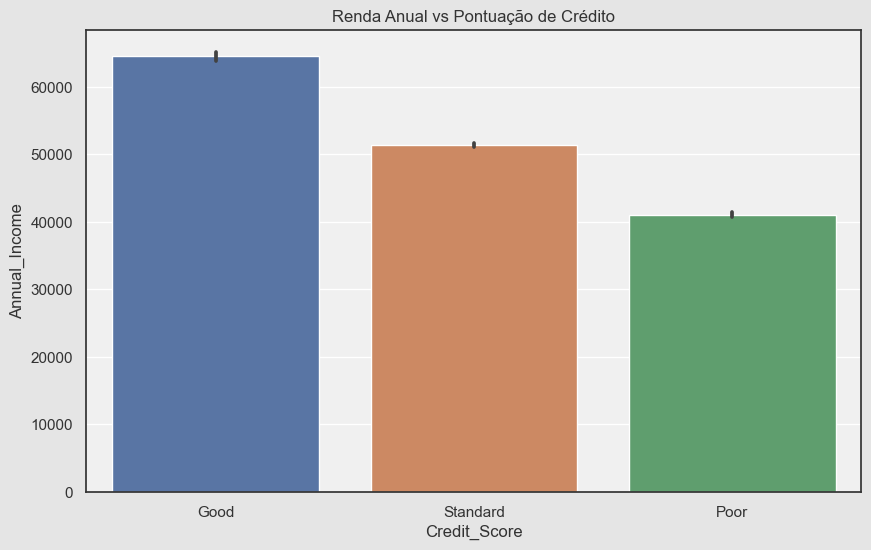

In [46]:
#Graficamente um olhar sobre Renda Anual por Pontuação de Crédito
sns.barplot(data=df_treinofiltrado_outliers, x='Credit_Score', y='Annual_Income');
plt.title('Renda Anual vs Pontuação de Crédito');

Como era de se esperar, pessoas com maiores rendas anuais, tem também melhores créditos.

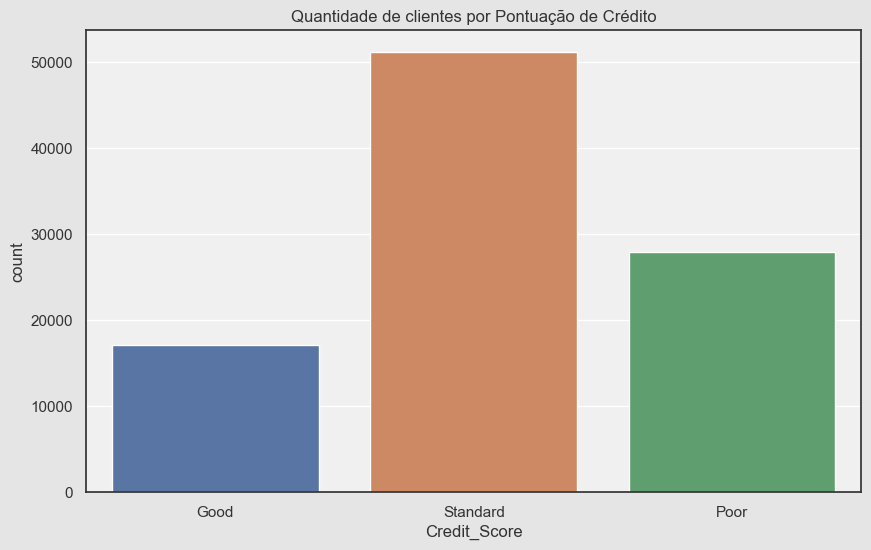

In [47]:
sns.countplot(data=df_treinofiltrado_outliers, x='Credit_Score');
plt.title('Quantidade de clientes por Pontuação de Crédito');

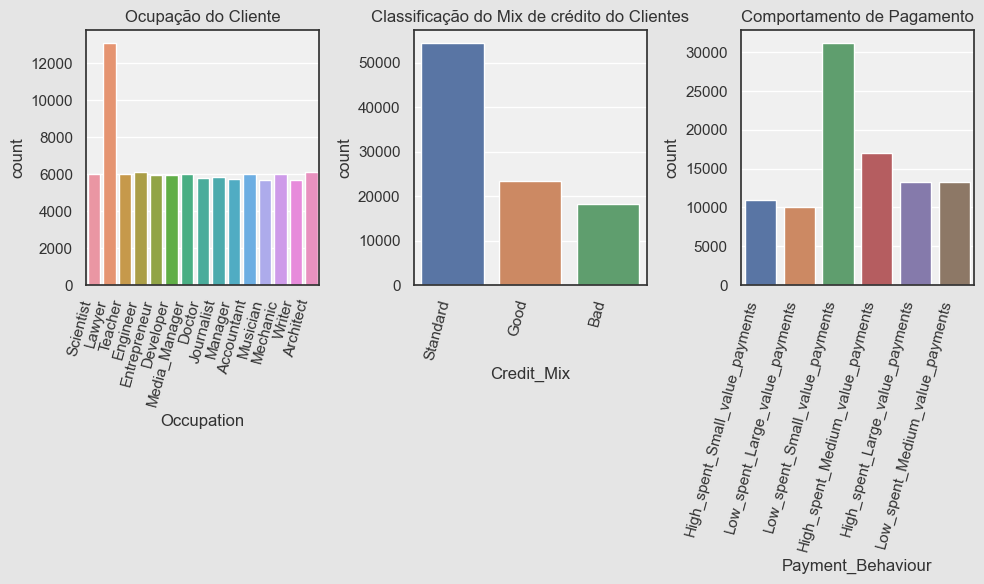

In [48]:
fig, axes = plt.subplots(1, 3)

sns.countplot(data=df_treinofiltrado_outliers, x='Occupation', ax=axes[0], )
axes[0].set_title('Ocupação do Cliente')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=75, ha='right')
sns.countplot(data=df_treinofiltrado_outliers, x='Credit_Mix', ax=axes[1])
axes[1].set_title('Classificação do Mix de crédito do Clientes')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=75, ha='right')
sns.countplot(data=df_treinofiltrado_outliers, x='Payment_Behaviour', ax=axes[2], )
axes[2].set_title('Comportamento de Pagamento')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=75, ha='right')
plt.tight_layout()
plt.show()

In [49]:
df_treinofiltrado_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96035 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       96035 non-null  int32  
 1   Occupation                96035 non-null  object 
 2   Annual_Income             96035 non-null  float64
 3   Monthly_Inhand_Salary     96035 non-null  float64
 4   Num_Bank_Accounts         96035 non-null  int64  
 5   Num_Credit_Card           96035 non-null  int64  
 6   Interest_Rate             96035 non-null  int64  
 7   Num_of_Loan               96035 non-null  int32  
 8   Type_of_Loan              96035 non-null  object 
 9   Delay_from_due_date       96035 non-null  int64  
 10  Num_of_Delayed_Payment    96035 non-null  float64
 11  Changed_Credit_Limit      96035 non-null  float64
 12  Num_Credit_Inquiries      96035 non-null  float64
 13  Credit_Mix                96035 non-null  object 
 14  Outstanding

Text(0.5, 1.0, 'Relação entre Pontuação de Crédito e Salário Mensal do Cliente')

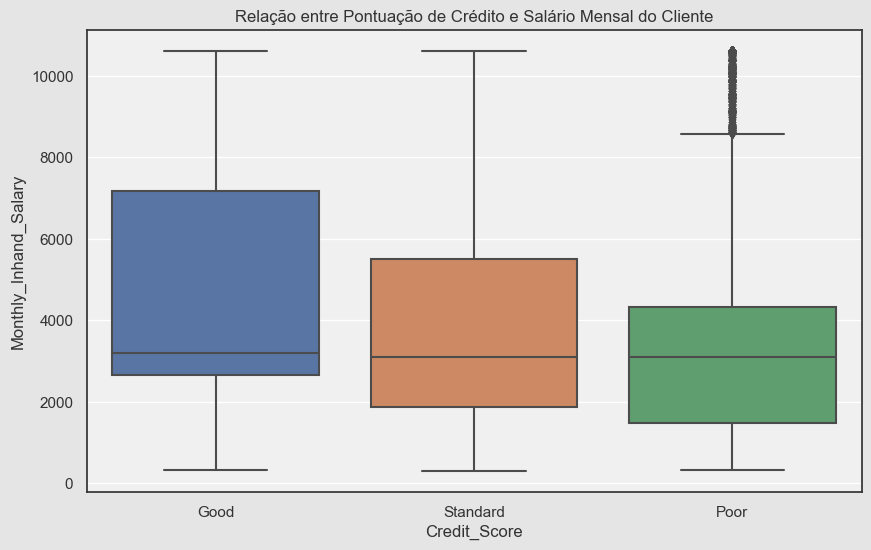

In [50]:
sns.boxplot(data=df_treinofiltrado_outliers, x="Credit_Score", y="Monthly_Inhand_Salary")
plt.title('Relação entre Pontuação de Crédito e Salário Mensal do Cliente')

### Tratando as variáveis Categóricas

In [51]:
df_treinofiltrado_outliers.Payment_of_Min_Amount.unique()

array(['No', 'NM', 'Yes'], dtype=object)

In [52]:
#Tratando a coluna acima.
df_treinofiltrado_outliers.Payment_of_Min_Amount = df_treinofiltrado_outliers.Payment_of_Min_Amount.replace({'NM': 'No'})

Teremos um tratamento específico para cada coluna.

In [53]:
print(len(df_treinofiltrado_outliers.Occupation.unique()))
print(len(df_treinofiltrado_outliers.Type_of_Loan.unique()))
print(len(df_treinofiltrado_outliers.Credit_Mix.unique()))
print(len(df_treinofiltrado_outliers.Payment_of_Min_Amount.unique()))
print(len(df_treinofiltrado_outliers.Payment_Behaviour.unique()))

15
6260
3
2
6


Para as features 'Occupation', Payment_of_Min_Amount', 'Payment_Behaviour' vamos utilizar One-Hot Encoding.

In [54]:
#Define as colunas
one_hot_cols = ['Occupation', 'Payment_of_Min_Amount', 'Payment_Behaviour']

#Instancia e aplica o encoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # sparse=False para retornar um array normal
encoded = encoder.fit_transform(df_treinofiltrado_outliers[one_hot_cols])

#Converte o array em DataFrame
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(one_hot_cols))

#Junta com o dataframe original (removendo as colunas originais)
df_treinofiltrado_outliers = pd.concat([
    df_treinofiltrado_outliers.drop(columns=one_hot_cols).reset_index(drop=True),
    encoded_df.reset_index(drop=True)
], axis=1)

#Fazendo o mesmo pra teste

#Transformar os dados de teste com o mesmo encoder já treinado
encoded_test = encoder.transform(df_testefiltrado_outliers[one_hot_cols])

#Gerar DataFrame com os mesmos nomes de colunas
encoded_test_df = pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out(one_hot_cols))

#Concatenar com o restante das colunas do teste
df_testefiltrado_outliers = pd.concat([
    df_testefiltrado_outliers.drop(columns=one_hot_cols).reset_index(drop=True),
    encoded_test_df.reset_index(drop=True)
], axis=1)

Para 'Type_of_Loan' por conta da contagem grande de elementos diferentes, utilizamos Target Encoding

In [55]:
X = df_treinofiltrado_outliers[['Type_of_Loan']]
y = df_treinofiltrado_outliers['Credit_Score']

#Inicializando o TargetEncoder com suavização automática
enc_auto = TargetEncoder(smooth="auto")

#Ajuste e transformação dos dados
X_trans = enc_auto.fit_transform(X, y)

#Agora X_trans é a versão codificada de X

encoded_df = pd.DataFrame(X_trans, columns=enc_auto.get_feature_names_out(['Type_of_Loan']))

#Concatendo novamente:
df_treinofiltrado_outliers = pd.concat([df_treinofiltrado_outliers, encoded_df], axis=1)
df_treinofiltrado_outliers.drop(columns=['Type_of_Loan'], axis=1, inplace=True)

#Fazendo o mesmo para Teste
X_test = df_testefiltrado_outliers[['Type_of_Loan']]  # A mesma coluna que foi usada para treino
X_test_trans = enc_auto.transform(X_test)  # Apenas transforma, não ajusta novamente

#Convertemos o X_test_trans para DataFrame para adicionar ao df_teste
encoded_test_df = pd.DataFrame(X_test_trans, columns=enc_auto.get_feature_names_out(['Type_of_Loan']))

#Adicionando as colunas codificadas ao DataFrame de teste
df_testefiltrado_outliers = pd.concat([df_testefiltrado_outliers, encoded_test_df], axis=1)
df_testefiltrado_outliers.drop(columns=['Type_of_Loan'], axis=1, inplace=True)


In [56]:
df_treinofiltrado_outliers['Credit_Score'] = y

In [57]:
#Transformando nossa variável alvo em numérica.

#Mapeamento das categorias para valores numéricos
credit_score_mapping = {'Good': 1, 'Standard': 2, 'Poor': 3}
credit_mix_mapping = {'Good': 1, 'Standard': 2, 'Bad': 3}

#Aplicando o mapeamento
df_treinofiltrado_outliers['Credit_Score'] = df_treinofiltrado_outliers['Credit_Score'].map(credit_score_mapping)
df_treinofiltrado_outliers['Credit_Mix'] = df_treinofiltrado_outliers['Credit_Mix'].map(credit_mix_mapping)
df_testefiltrado_outliers['Credit_Mix'] = df_testefiltrado_outliers['Credit_Mix'].map(credit_mix_mapping)

In [58]:
#Separando os dados (use o df que ainda tem Credit_Score mapeado corretamente)
X = df_treinofiltrado_outliers.drop(columns=['Credit_Score'])
y = df_treinofiltrado_outliers['Credit_Score']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Escalando
ro_scaler = RobustScaler()
X_train_scaled = ro_scaler.fit_transform(X_train)
X_val_scaled = ro_scaler.transform(X_val)


In [59]:
#Treinando o modelo
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train_scaled, y_train)

#Avaliando no conjunto de validação
y_pred_val = log_reg.predict(X_val_scaled)
print("Accuracy (validação):", accuracy_score(y_val, y_pred_val))
print(classification_report(y_val, y_pred_val))

Accuracy (validação): 0.7075024730566981
              precision    recall  f1-score   support

           1       0.61      0.50      0.55      3410
           2       0.70      0.82      0.76     10224
           3       0.78      0.63      0.70      5573

    accuracy                           0.71     19207
   macro avg       0.70      0.65      0.67     19207
weighted avg       0.71      0.71      0.70     19207



In [60]:
#Inicializando o modelo com parâmetros básicos
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')  # 'balanced' para lidar com classes desiguais

#Treinando
rf_model.fit(X_train_scaled, y_train)

#Validando
y_pred_rf = rf_model.predict(X_val_scaled)

#Avaliando
print("Random Forest - Accuracy:", accuracy_score(y_val, y_pred_rf))
print(classification_report(y_val, y_pred_rf))

Random Forest - Accuracy: 0.7986671526006144
              precision    recall  f1-score   support

           1       0.76      0.71      0.73      3410
           2       0.81      0.81      0.81     10224
           3       0.80      0.82      0.81      5573

    accuracy                           0.80     19207
   macro avg       0.79      0.78      0.79     19207
weighted avg       0.80      0.80      0.80     19207



In [74]:
#Transformando em um relatório para comparar os modelos
report_log = classification_report(y_val, y_pred_val, output_dict=True, zero_division=0)
report_rf = classification_report(y_val, y_pred_rf, output_dict=True, zero_division=0)

#Extrair as métricas médias -- Macro Avg
metrics_df = pd.DataFrame({
    'Logistic Regression': {
        'Accuracy': accuracy_score(y_val, y_pred_val),
        'Precision': report_log['macro avg']['precision'],
        'Recall': report_log['macro avg']['recall'],
        'F1-score': report_log['macro avg']['f1-score']
    },
    'Random Forest': {
        'Accuracy': accuracy_score(y_val, y_pred_rf),
        'Precision': report_rf['macro avg']['precision'],
        'Recall': report_rf['macro avg']['recall'],
        'F1-score': report_rf['macro avg']['f1-score']
    }
})

print(metrics_df.T)

                     Accuracy  Precision    Recall  F1-score
Logistic Regression  0.707502   0.696445  0.650799  0.668179
Random Forest        0.798667   0.788567  0.783115  0.785520


O RandomForest, realmente se saiu um modelo melhor em todos os parâmetros.

### Teste final - Rodar o modelo na base de teste!

Vamos verificar o modelo com a base de teste, a base que também trabalhamos ao longo dessa análise.

In [75]:
#Escalando com o mesmo scaler do treino
X_test_scaled = ro_scaler.transform(df_testefiltrado_outliers)

# Previsões
y_pred_test_log = log_reg.predict(X_test_scaled)
y_pred_test_rf = rf_model.predict(X_test_scaled)

# Exibindo contagem das classes previstas
print("Logistic Regression - Previsões:", pd.Series(y_pred_test_log).value_counts())
print("Random Forest - Previsões:", pd.Series(y_pred_test_rf).value_counts())

Logistic Regression - Previsões: 2    28977
3    11824
1     7246
Name: count, dtype: int64
Random Forest - Previsões: 2    25447
3    14693
1     7907
Name: count, dtype: int64


Como a base de teste não possui os rótulos reais (Credit_Score), utilizamos apenas para inferência.

Este projeto foi desenvolvido com foco na limpeza de dados, tratamento de outliers e dados ausentes, encoding de variáveis categóricas e aplicação de dois modelos supervisionados. A base de teste foi utilizada para inferência final, simulando como os modelos se comportariam em dados reais. O modelo Random Forest se destacou em todos os critérios de avaliação, e suas previsões finais foram salvas para entrega ou análise posterior.

In [84]:
#Salvando os resultados.

df_resultados = pd.DataFrame({
    'ID': df_testefiltrado_outliers.index,
    'Pred_RF': y_pred_test_rf,
    'Pred_LogReg': y_pred_test_log
})

df_resultados.to_csv('predicoes_credit_score.csv', index=False)

print('Arquivo salvo com sucesso')

Arquivo salvo com sucesso


Lembre-se que 1 -- Good; 2 -- Stantard; 3 -- Poor

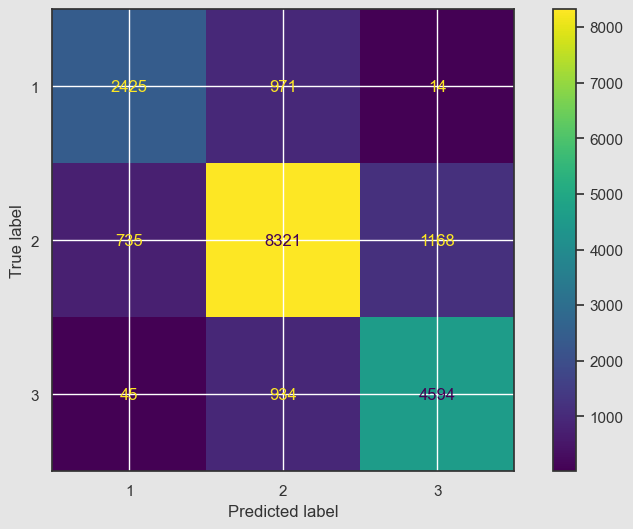

In [85]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_val, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot()

1ª linha (Classe real: 1 – Good)  
→ 2.425 valores foram corretamente classificados como Good.  
→ 971 foram classificados incorretamente como Standard.  
→ 14 foram classificados incorretamente como Poor.  

2ª linha (Classe real: 2 – Standard)  
→ 735 foram classificados incorretamente como Good.  
→ 8.321 foram corretamente classificados como Standard.  
→ 1.168 foram classificados incorretamente como Poor.  

3ª linha (Classe real: 3 – Poor)  
→ 45 foram classificados incorretamente como Good.  
→ 934 foram classificados incorretamente como Standard.  
→ 4.594 foram corretamente classificados como Poor.  

In [88]:
metrics_df.T

,Accuracy,Precision,Recall,F1-score
Logistic Regression,0.707502,0.696445,0.650799,0.668179
Random Forest,0.798667,0.788567,0.783115,0.785520
